# Parte II - Regresión Lineal

La regresión es un método que nos permite estudiar la relación entre una variable de resultado $Y$ y una covariable o predictor $X$. 

Aunque no siempre se busca determinar si existe una relación causal, el problema de causalidad ocupa un lugar central en la agenda de los microeconometristas.

## 2.1 Aplicación: Aprendizaje y Tamaño de Clase

¿Cuál es la mejor forma de asignar el gasto en educación? ¿Es buena idea tener clases de menor tamaño? Estas son preguntas de interés no solo para economistas sino también para gobiernos y la sociedad en general. Sin embargo, por mucho tiempo la literatura presentó evidencia no concluyente o mixta.

Parte del problema para responder estas preguntas está relacionado con que sabemos muy poco acerca de cómo aprenden los estudiantes. En particular, múltiples factores afectan los resultados de los estudiantes. Suponiendo que existe una función de producción educativa, $f$, ¿qué elementos cree usted que explican el aprendizaje?

\begin{equation}
\text{Aprendizaje} = f(?)
\end{equation}

Existen diferentes factores que confluyen al tiempo en el aprendizaje de los estudiantes, entre ellos 

- Calidad docente
- Compañeros de clase
- Padres y condiciones del hogar
- Infraestructura
- Tamaño de clase
- Habilidades innatas 

[Krueger (1999)](https://doi.org/10.1162/003355399556052) utilizó información de un experimento aleatario en Tennessee (STAR), encontrando que los estudiantes asignados a clases más pequeñas obtienen mejores resultados en pruebas estandarizadas y que este efecto positivo es persistente en el tiempo. Luego veremos por qué las estimaciones de Krueger pueden ser interpretadas como relaciones causales.

## 2.2 Regresión Simple o Univariada

La función de regresión, $r(X)$, resume la relación entre $X$ y $Y$: 

$$
r(x) = \mathbb{E}(Y | X = x) = \int y f(y|x) dy.
$$ 

Nuestro objetivo es estimar $r(x)$ usando datos de la forma 

$$\{Y_i , X_i\}_{i = 1}^n$$

Definamos el error $\varepsilon = Y - r(x)$. De esta manera, podemos escribir: 

$$
Y = r(x) + \varepsilon
$$

En su versión más simple, $X$ es unidimensional y asumimos que $r(x)$ es lineal. Así, 

$$r(x) = \beta_0 + \beta_1 x.$$

El modelo regresión lineal simple se define como: 

$$
Y_i = r(x) + \varepsilon_i = \beta_0 + \beta_1 X_i + \varepsilon_i
$$ 

Observe que los parámetros desconocidos en este modelo son el intercepto $\beta_0$ y la pendiente $\beta_1$.

## 2.3 Supuestos del Modelo

Para estimar el modelo de regresión suponemos:

- Linealidad en los parámetros
- No multicolinealidad o Rango Completo
- Homoscedasticidad
- No autocorrelación
- Distribución Normal de los Errores
- Independencia Condicional o Exogenidad

Algunos de estos supuestos hace que el modelo sea **estimable**, otros nos permiten hacer **inferencia** sobre los parámetros

### 2.3.1 Linealidad en Parámetros

Este supuesto es necesario para que el modelo sea **estimable**.

Se refiere a la forma funcional de la función de regresión $r(x) = \beta_0 + \beta_1 X_i$.

Note que nos interesa estimar $\beta_k$, no $\beta_k^2$, $\ln(\beta_k)$, o cualquier otra función $g(\beta_k)$.

<div class="alert alert-block alert-warning"> 
<b>EJEMPLO:</b>
<p>

Suponga queremos estimar el parámetro $\beta$ de la función $y = A X^\beta e^\varepsilon$. ¿Podemos usar el modelo de regresión lineal?

Sí, note que podemos utilizar la siguiente transformación:

$$\ln y_i = \alpha + \beta \cdot X_i + \varepsilon_i, \text{ con } \alpha = \ln A$$

¿Qué pasa si $y = A X^\beta e^\varepsilon + u$ ?
</div>

### 2.3.2 No Multicolinealidad o Rango Completo

Este supuesto es necesario para que el modelo sea **estimable**.

El supuesto hace referencia a la información que aportan diferentes covariables. En primer lugar, este supuesto señala que:

$$|\rho(X_{1i}, X_{2i})| \neq 1$$

Donde $\rho$ es el coeficiente de correlación. Este supuesto será más relevante cuando estudiemos el modelo de regresión múltiple.

Adicionalmente, es necesario que el número de observaciones en los datos $n$ sea mayor al número de parámetros $k$ que queremos estimar. Es decir

$$n \geq k$$

### 2.3.3 Homoscedasticidad

Este supuesto es sobre la varianza y nos facilita realizar pruebas de hipótesis

El supuesto establece que:

$$V(\varepsilon_i | X) = \sigma^2$$

La violación de este supuesto se conoce como **heteroscedasticidad**. En un modelo **heteroscedástico** 

$$V(\varepsilon_i | X) = \sigma_i^2$$

### 2.3.4 No Autocorrelación

Este supuesto establece que:

$$Cov(\varepsilon_i, \varepsilon_j | X) = 0 \text{ para todo } i \neq j$$

La violación de este supuesto se conoce como **autocorrelación**.

### 2.3.5 Distribución Normal de los Errores

Este supuesto se hace sobre los errores entonces también afecta las pruebas de hipótesis.

El supuesto señala que:

$$\varepsilon_i | X \sim N(0, \sigma^2)$$

Observe que por el teorema del límite central este supuesto no es tan fuerte, y si muy útil para determinar cómo se distribuyen ciertos estadísticos.

### 2.3.6 Independencia Condicional o Exogenidad

Para que los estimadores de $\beta_k$ sean insesgados y consistentes suponemos que

$$E(\varepsilon_i | X) = E(\varepsilon_i)$$

Observe que combinado con el supuesto anterior tenemos que: 

$$E(\varepsilon_i | X) = 0$$

Según este supuesto $\varepsilon$ es indepente de $X$. En otras palabras $X$ es una variable exogena. 

Este supuesto garantiza que los efectos encontrados pueden se interpretados como estimaciones **causales**.

## 2.4 Estimación por MCO

Para estimar $\beta_0$ y $\beta_1$ podemos usar el método de Mínimos Cuadrados Ordinarios (MCO), de manera formal: 

$$\{\hat\beta_0, \hat\beta_1\} = \operatorname*{arg\,min} \mathcal{L}(\beta_0, \beta_1)$$

donde $\mathcal{L}(\beta_0, \beta_1) = \sum_i {\varepsilon_i}^2 = \sum_i ({Y_i} - \beta_0 - \beta_1 X_i)^2$

Las condiciones de primer orden (CPO) de este problema estan dadas por: 

$$\frac{\partial\mathcal{L}}{\partial\beta_0} \bigg|_{(\hat\beta_0, \hat\beta_1)} = \sum_i (-2) \cdot ({Y_i} - \beta_0 - \beta_1 X_i) \bigg|_{(\hat\beta_0, \hat\beta_1)} = 0$$

$$\frac{\partial\mathcal{L}}{\partial\beta_1} \bigg|_{(\hat\beta_0, \hat\beta_1)} = \sum_i (-2 X_i) \cdot ({Y_i} - \beta_0 - \beta_1 X_i) \bigg|_{(\hat\beta_0, \hat\beta_1)} = 0$$

Estas ecuaciones se conocen como **ecuaciones normales**.

A partir de estas condiciones obtenemos los siguientes **estimadores**:

$$\hat\beta_0 = \overline Y - \hat\beta_1 \overline X$$

$$\hat\beta_1 = \frac{\sum_i (X_i - \overline X)(Y_i - \overline Y)}{\sum_i (X_i - \overline X)^2} = \frac{\mathbb{\hat Cov}(X, Y)}{\mathbb{\hat V}(X)}$$ 

De esta manera, la **linea ajustada** está dada por $\hat r(x) = \hat\beta_0 + \hat\beta_1 x$, y los **valores predichos** se definen como $\hat Y_i = \hat r(X_i)$

Definimos además el **residual** como $$e_i = Y_i - \hat Y_i = Y_i - \left(\hat\beta_0 + \hat\beta_1 X_i \right)$$

## 2.5 Aplicacion : Relación entre Aprendizaje y Crecimiento

Vamos a usar datos de las pruebas PISA, que toman estudiantes de 15 años de diversos paises, para estudiar la relación entre aprendizaje y recursos económicos

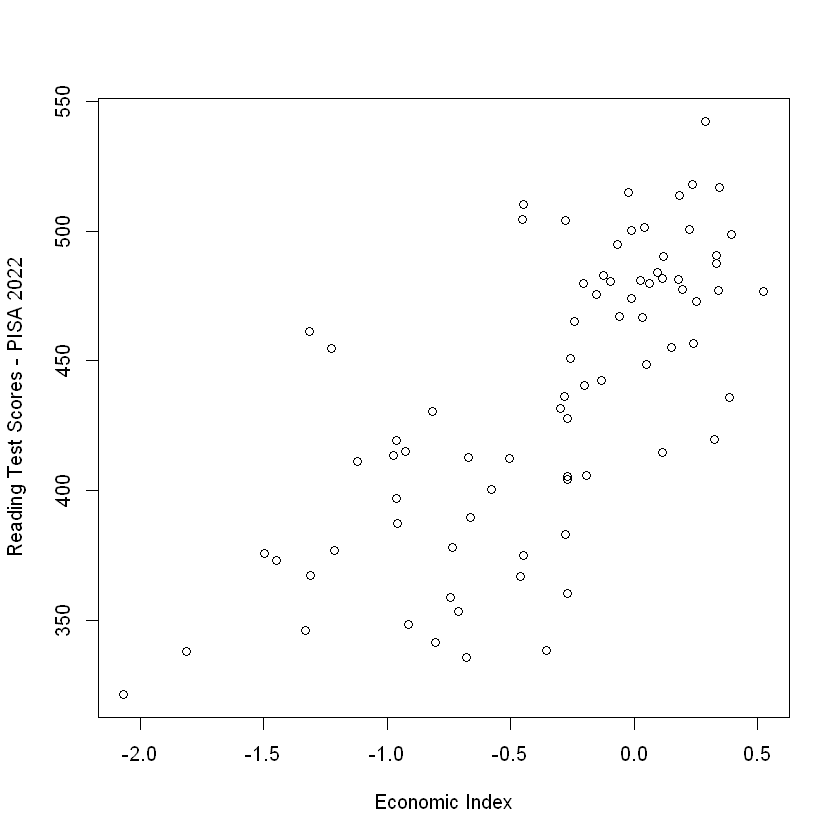

In [27]:
datos <- data.frame(
  cnt = c("ALB","ARE","ARG","AUS","AUT","BEL","BGR","BRA","BRN","CAN","CHE","CHL","COL","CRI","CZE","DEU","DNK","DOM","ESP","EST","FIN","FRA","GBR","GEO","GRC","GTM","HKG","HRV","HUN","IDN","IRL","ISL","ISR","ITA","JAM","JOR","JPN","KAZ","KHM","KOR","KSV","LTU","LVA","MAC","MAR","MDA","MEX","MKD","MLT","MNE","MNG","MYS","NLD","NOR","NZL","PAN","PER","PHL","POL","PRT","PRY","PSE","QAT","QAZ","QUR","ROU","SAU","SGP","SLV","SRB","SVK","SVN","SWE","TAP","THA","TUR","URY","USA","UZB","VNM"),
  math = c(368.25405,433.82986,388.54898,487.16594,490.87702,494.01554,418.33838,381.13655,440.66541,484.52203,506.45947,428.55602,390.80082,384.34594,499.37027,477.74352,478.7986,339.82878,481.86548,512.71336,475.32395,468.24401,481.82223,390.46145,433.54079,345.55713,546.03005,462.98476,479.72656,379.03128,492.17959,459.27331,457.12382,474.03372,371.40991,360.30719,534.92948,446.01273,327.40929,531.09303,352.41048,471.54378,482.58027,552.05427,363.36233,415.52394,395.40581,390.49863,468.9976,406.00521,423.92532,409.49151,491.04093,468.47831,478.87437,353.49833,394.15257,354.16683,494.4546,475.57748,340.78028,364.66173,411.98931,398.33636,444.34014,435.55027,389.20505,573.98391,345.12158,439.81693,468.62039,471.70524,482.4206,533.87613,414.58713,451.8851,409.28728,462.80969,363.90947,468.83368),
  read = c(358.8281,419.71994,412.83373,498.79545,484.0255,481.7429,405.41276,413.32812,427.66587,490.52696,481.54308,465.12644,419.17929,415.22553,500.25072,483.0404,477.21655,353.15524,480.86845,513.84343,477.53438,467.01198,490.44853,375.03115,442.52392,375.55029,504.42272,475.74213,479.98543,372.90122,516.88935,436.02972,473.09826,480.65205,400.32092,341.46512,515.07793,404.15901,321.2015,517.97604,338.17407,466.72213,474.2778,510.36214,337.91559,412.49955,415.23693,360.23238,448.79677,405.80333,377.88235,389.52229,456.80425,476.63287,500.62093,387.40349,411.3118,345.80676,495.10716,480.06531,376.70185,348.16283,414.6251,366.71778,431.63915,436.35943,383.16603,542.47853,367.1504,440.34278,450.99055,455.30676,487.52261,504.32483,396.81118,454.84742,430.33206,501.33838,335.69292,461.27979),
  scie = c(376.45612,434.89017,416.65516,507.91081,494.86606,494.80982,421.72777,405.9808,444.34865,500.98817,500.80958,461.86337,420.46238,410.20256,510.04275,495.53081,481.59372,361.725,491.143,528.51191,498.51606,481.40229,492.73984,385.03211,445.14657,374.28158,524.42376,482.90977,492.44187,395.31191,504.3107,447.24463,464.2001,480.90591,394.72014,373.75317,546.25504,440.96584,341.14726,531.3388,353.75366,479.50271,493.00024,543.14931,364.28557,418.00956,410.76032,381.67947,468.78635,404.08089,411.62124,417.15835,486.63188,478.18198,503.74646,383.48177,410.52702,355.28466,504.86972,487.69184,371.42047,367.63747,428.26692,381.6494,453.79679,436.78672,390.96302,560.97909,374.21203,447.30452,467.28861,486.88349,494.4219,526.40753,429.0165,475.16645,435.88107,497.41058,355.05556,472.23249),
  econ_index = c(-.74391004,.32525118,-.67148081,.39335586,.09302247,.1154232,-.27047491,-.97523877,-.27116078,.3339245,.1809795,-.24284266,-.96515588,NA,-.01307006,-.12423293,.34054443,-.71082132,.02354851,.18467558,.19358048,-.05861012,.11972009,-.44695238,-.13303286,-1.4975343,-.45290783,-.1523256,.06026681,-1.4481847,.34413547,.38376268,.25381603,-.09725531,-.57839371,-.80391485,-.02354713,-.26977891,-2.0669077,.23721704,-.3564011,.03484754,-.00981672,-.44904569,-1.8117468,-.50431186,-.92555928,-.26902116,.04917327,-.1922437,-.73720841,-.66233746,.23876144,.52544167,.22389294,-.96079427,-1.1207972,-1.3333803,-.06879525,-.2048969,-1.2130009,-.91617362,.11453604,-.46005621,-.29700884,-.28406969,-.27803347,.29037254,-1.3106626,-.20093189,-.25804407,.15198116,.33239471,-.28002015,-.96258429,-1.2274957,-.81679644,.04198107,-.68010732,-1.3159208)
)
datos <- na.omit(datos)
plot(datos$econ_index, datos$read, xlab  = "Economic Index", ylab = "Reading Test Scores - PISA 2022")

In [28]:
model <- lm(read ~ econ_index, data = datos)
summary(model)


Call:
lm(formula = read ~ econ_index, data = datos)

Residuals:
    Min      1Q  Median      3Q     Max 
-98.150 -20.616   3.319  24.557  91.063 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  460.878      5.218  88.331  < 2e-16 ***
econ_index    68.896      7.821   8.809  2.8e-13 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 39.54 on 77 degrees of freedom
Multiple R-squared:  0.5019,	Adjusted R-squared:  0.4955 
F-statistic:  77.6 on 1 and 77 DF,  p-value: 2.797e-13


In [29]:
#Prediccion
model_fit <- as.data.frame(predict(model, se.fit = TRUE, , interval = "confidence",  data = datos, level = 0.99))
names(model_fit) <- c('yhat', 'lwr', 'upr', 'se', 'df', 'residuals')
head(model_fit, 5)

,yhat,lwr,upr,se,df,residuals
,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>
1,409.6258,395.3168,423.9347,5.417594,77,39.54123
2,483.2867,465.0712,501.5022,6.896686,77,39.54123
3,414.6158,401.1048,428.1269,5.115512,77,39.54123
4,487.9789,468.6670,507.2907,7.311772,77,39.54123
5,467.2871,452.4118,482.1624,5.632037,77,39.54123


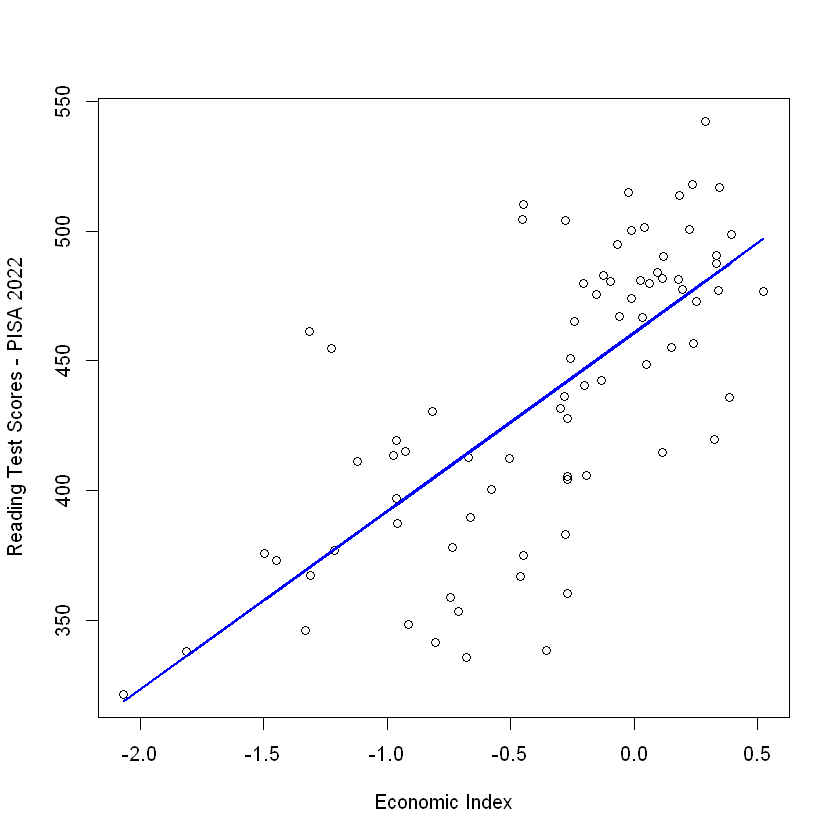

In [30]:
plot(datos$econ_index, datos$read, xlab  = "Economic Index", ylab = "Reading Test Scores - PISA 2022")
lines(datos$econ_index, model_fit$yhat, col = "blue", lwd=2, lty = 1)

## 2.6 Residuales de la Regresión: $e_i = Y_i - \hat Y_i$

Observe que a partir de las ecuaciones normales tenemos que 

$$\sum_i ({Y_i} - \hat\beta_0 - \hat\beta_1 X_i) = \sum_i e_i = 0$$

$$\sum_i (X_i) \cdot ({Y_i} - \hat\beta_0 - \hat\beta_1 X_i) = \sum_i e_i \cdot X_i = 0$$

Lo anterior indica que:

$$\frac{\sum_i e_i}{n} = \bar e = 0 \hspace{5pt} \Rightarrow \hspace{5pt} \bar Y = \bar{\hat Y}$$

$$\sum_i e_i \cdot X_i = 0 \hspace{5pt} \Rightarrow \hspace{5pt} \mathbb{\hat Cov}(e_i, X_i) = \sum_i (e_i - \bar e) \cdot (X_i - \bar X) = 0$$


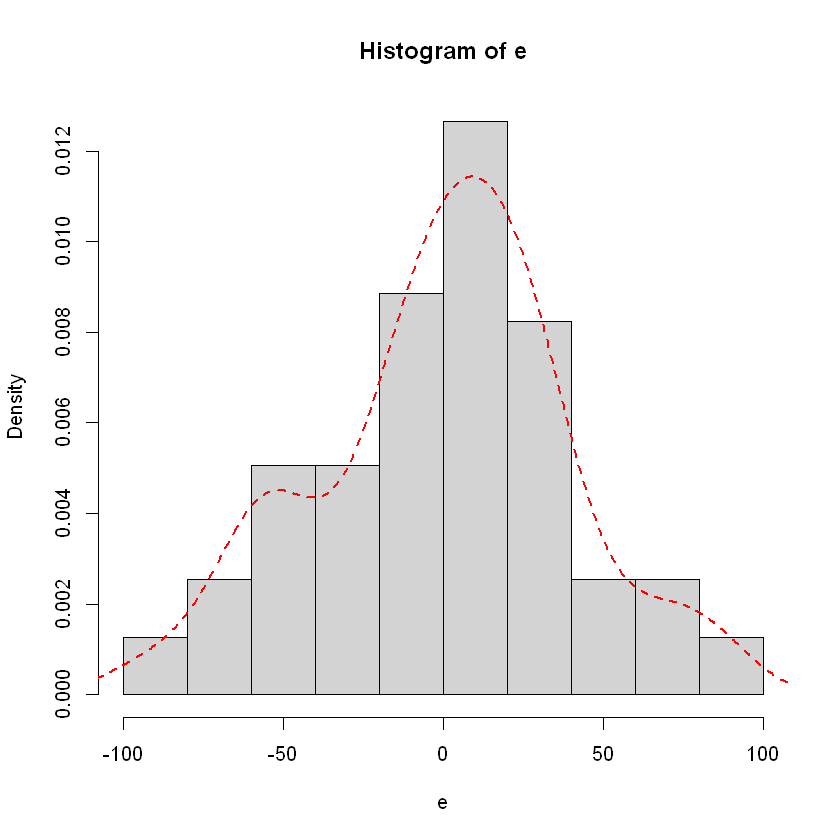

In [31]:
#Predecir los errores
e <- datos$read - model_fit$yhat

#Estimacion de la función de densidad
hist(e, prob = T)
lines(density(e), lty = 2, lw = 2, col = "red")

## 2.7 Propiedades de los estimadores $\hat\beta_k$

Queremos evaluar si $\hat\beta_1$ es un buen estimador de $\beta_1$. 

La primera pregunta que nos hacemos es ¿$E(\hat\beta_1) = \beta_1$? Es decir, queremos ver si $\hat\beta_1$ es un estimador insesgado.

Note que 

\begin{align*}
    \hat\beta_1 & = \frac{\sum_i (X_i - \overline X)(Y_i - \overline Y)}{\sum_i (X_i - \overline X)^2}\\
     & = \frac{\sum_i (X_i - \overline X)(\beta_0 + \beta_1 X_i + \varepsilon_i - \beta_0 - \beta_1 \bar X - \bar \varepsilon)}{\sum_i (X_i - \overline X)^2}\\
    & = \beta_1 + \frac{\sum_i (X_i - \overline X)(\varepsilon_i - \overline \varepsilon)}{\sum_i (X_i - \overline X)^2}\\
    & = \beta_1 + \frac{\sum_i (X_i - \overline X) \cdot \varepsilon_i}{\sum_i (X_i - \overline X)^2} \\     
\end{align*}

Si tomamos la esperanza de esta exprensión tenemos:

\begin{align*}
    E(\hat\beta_1) & = \beta_1 + E \left(\frac{\sum_i (X_i - \overline X) \cdot \varepsilon_i}{\sum_i (X_i - \overline X)^2}\right) \\    
\end{align*}

A partir del supuesto de **independencia condicional**, para todo $i$ y $j$, $\varepsilon_i$ y $X_j$ son independientes. Es decir,

$$E(\varepsilon_i \cdot X_j) = E(\varepsilon_i) \cdot E(X_j) = 0$$

Debido a esto:

$$E\left(\sum_i (X_i - \overline X) \cdot \varepsilon_i\right) = \sum_i E(X_i \varepsilon_i) - \sum_i E(\overline X \varepsilon_i) = \sum_i E(X_i) E(\varepsilon_i) - \sum_i E(\overline X) E(\varepsilon_i) = 0$$

De esta manera, el estimador $\hat\beta_1$, que obtuvimos por el método MCO, es insesgado. Así,

$$E(\hat\beta_1) = \beta_1$$

Es $\beta_0$ un estimador insesgado?

\begin{align*}
    E(\hat\beta_0) & =E \left(\overline Y - \hat\beta_1 \overline X \right)\\
     & = E\left(\beta_0 + \beta_1 \overline X + \overline\varepsilon - \hat\beta_1 \overline X\right)\\
     & = \beta_0 + \beta_1 E(\overline X) + E(\overline\varepsilon) - \beta_1 E(\overline X)\\
     & = \beta_0 \\
\end{align*}

## 2.8 Inferencia en Regresión Simple

Luego de estimar el modelo, y saber que en promedio nuestros estimadores de MCO encuentran los verdaderos parámetros que se desconocen, queremos determinar si 

1. existe una relación **estádisticamente significativa** entre $Y$ y $X$ 
2. nuestro modelo tiene un buen ajuste (o poder predictivo)

Con este objetivo en mente, 

1. realizaremos pruebas de hipotesis individuales y conjuntas
2. computaremos el coeficiente de determinación $R^2$.

### 2.8.1 Pruebas de Hipótesis sobre $\hat\beta_k$

Debido al supuesto de **normalidad de los errores**, $\varepsilon_i | X \sim N(0, \sigma^2)$, es posible probar que 

$$\hat\beta_k | X \sim N(\beta_k, \sigma^2_\beta)$$

Sin entrar en detalles, recuerde que la suma de variables normales da como resultado una variable que se distribuye normal. Esta es la idea fundamental detrás de la demostración de que nuestros estimadores de MCO son normales.

La hipotesis que queremos considerar en general toma la siguiente forma:

$$H_0 : \beta_k = 0$$
$$H_1 : \beta_k \neq 0$$


Note que bajo la hipótesis nula ($H_0$) el parámetro $\beta_k$ es cero, y queremos saber si podemos rechazar dicha hipotesis con un nivel de significancia $\alpha \in \{0.1, 0.05, 0.01\}$.

Para probar esta hipótesis podemoslos usar el siguiente estadístico:

$$\frac{\hat\beta_k - \beta_k}{\sigma_\beta}$$

Sin embargo, desconocemos $\sigma_\beta$. Esto implica que debemos estimarlo.

### 2.8.2 Varianza de $\hat\beta_k$

Recuerde $\hat\beta_1 = \frac{\mathbb{\hat Cov}(X, Y)}{\mathbb{\hat V}(X)} = \beta_1 + \frac{\sum_i (X_i - \overline X) \cdot \varepsilon_i}{\sum_i (X_i - \overline X)^2}$. De esta manera,

\begin{align*}
    V(\hat\beta_1 | X) & = E \left(\hat\beta_1 - E(\hat\beta_1) | X \right)^2 = E \left(\hat\beta_1 - \beta_1 | X \right)^2 = E \left(\frac{\sum_i (X_i - \overline X) \cdot \varepsilon_i}{\sum_i (X_i - \overline X)^2} | X \right)^2 \\ 
    & = \left(\frac{1}{\sum_i (X_i - \overline X)^2}\right)^2 E \left(\sum_i (X_i - \overline X) \cdot \varepsilon_i | X \right)^2 \\
    & = \left(\frac{1}{\sum_i (X_i - \overline X)^2}\right)^2 E \left(\sum_i (X_i - \overline X)^2 \cdot \varepsilon_i^2 + 2 \sum_{i < j} (X_i - \overline X) (X_j - \overline X) \varepsilon_i \varepsilon_j | X \right) \\
    & = \left(\frac{1}{\sum_i (X_i - \overline X)^2}\right)^2 \left(\sum_i (X_i - \overline X)^2 \cdot E(\varepsilon_i^2 | X) \right) \\ 
    & = \frac{\sigma^2}{\sum_i (X_i - \overline X)^2} = \frac{\sigma^2}{S^2_X (n-1)} \\
\end{align*}

Note que para estimar esta varianza debemos encontrar un estimador para $\sigma^2$ 

### 2.8.3 Varianza de los Errores

Antes de encontrar un estimador para $\sigma^2$, note que

\begin{align*}
    V(Y_i | X_i) & = V(\beta_0 + \beta_1 X_i + \varepsilon_i | X) \\
    & = V(\beta_0 + \beta_1 X_i | X) + V(\varepsilon_i | X) + 2 \cdot Cov(\beta_0 + \beta_1 X_i, \varepsilon_i | X) \\
    & = V(\varepsilon_i | X) = \sigma^2 \\
\end{align*}

Más aún, observe que 

$$Y_i | X \sim N(\beta_0 + \beta_1 X_i, \sigma^2)$$

Ahora, ya que $E(\varepsilon_i) = 0$, podemos mostrar que 

$$V(\varepsilon_i | X) = E(\varepsilon_i^2)$$

Un estimador para $\sigma^2$ es:

$$\hat\sigma^2 = \frac{\sum_i e_i^2}{n-K} = \frac{\sum_i (Y_i - \hat Y_i)^2}{n-K} = \frac{\sum_i (Y_i - \hat\beta_0 - \hat\beta_1 X_i)^2}{n-K} $$

Donde $K$ es el número de parámetros que debemos estimar. En este caso $K = 2$.


### 2.8.4 Pruebas de Hipótesis Individuales

Para nuestra prueba de hipótesis 

$$H_0 : \beta_1 = 0$$
$$H_1 : \beta_1 \neq 0$$

Usaremos el siguiente estadístico de prueba

$$T = \frac{\hat\beta_1 - \beta_1}{\text{ee}(\hat\beta_1)}$$

Donde el error estandar de $\hat\beta_1$ se define como:

$$\text{ee}(\hat\beta_1) = \sqrt{ \frac{\sum_i e_i^2/n-K}{\sum_i (X_i - \overline X)^2}}$$

Observe que nuestro estadístico $T \sim t_{n-K}$. Esto se debe a que $\hat\beta_1 \sim N(\beta_1, \sigma_{\beta_1})$ y $\sum_i e_i^2 \sim \chi^2_{n-K}$

### 2.8.4 Intervalo de confianza para $\beta_k$

Nuestro intervalo de confianza para el parámetro desconocido $\beta_k$ está dado por 

\begin{align*}
    IC & = \left(\beta_k - t_{\alpha/2 \hspace{2pt},\hspace{2pt} n-K}\cdot\sqrt{ \frac{\sum_i e_i^2/n-K}{\sum_i (X_i - \overline X)^2}} \hspace{5pt} , \hspace{5pt} \beta_k + t_{\alpha/2 \hspace{2pt},\hspace{2pt} n - K}\cdot\sqrt{ \frac{\sum_i e_i^2/n-K}{\sum_i (X_i - \overline X)^2}} \right)
\end{align*}

Cuando $n$ es grande, si $\alpha = 0.05$, entonces $|t_{\alpha/2 \hspace{2pt},\hspace{2pt} n-K}| \approx 1.96$


### 2.8.5 Coeficiente de Determinación: $R^2$

Una segunda forma de evaluar nuestro modelo es sabiendo qué tanto de $\boldsymbol{Y}$ puede $\boldsymbol{X}$ explicar.

Para saber esto debemos hacer lo siguiente:
\begin{align*}
Y_i  &= \hat Y_i + e_i \\
Y_i -\bar{Y} &= \hat Y_i -\bar{Y} + e_i \\
\sum_i (Y_i -\bar{Y})^2 &= \sum_i (\hat Y_i -\bar{Y} + e_i)^2 \\
\sum_i (Y_i -\bar{Y})^2 &= \sum_i (\hat Y_i -\bar{Y})^2 + \sum_i e_i^2 + 2 \sum_i e_i (\hat Y_i -\bar{Y}) \\
\sum_i (Y_i -\bar{Y})^2 &= \sum_i (\hat Y_i -\bar{Y})^2 + \sum_i e_i^2
\end{align*}
    
Esto es así porque

\begin{align*}
\sum_i e_i (\hat Y_i -\bar{Y}) &= \sum_i e_i \hat Y_i - \bar{Y}\sum e_i \\
&= \sum_i e_i(\hat \beta_0 + \hat \beta_1 X_i) - \bar{Y}\sum e_i = 0
\end{align*}

Es decir, a partir de nuestros estimadores de MCO

\begin{align*}
\underbrace{\sum_i (Y_i -\bar{Y})^2}_{\text{Varianza Total } (SST)} &= \sum_i (\hat Y_i -\bar{Y})^2 + \sum_i e_i^2 \\
&= \underbrace{\sum_i (\hat Y_i -\bar{Y})^2}_{\text{Varianza Explicada } (SSR)} + \underbrace{\sum_i (Y_i - \hat Y_i)^2}_{\text{Varianza No Explicada } (SSE)}
\end{align*}

Luego podemos definir:

\begin{align*}
R^2 &= \frac{SSR}{SST} = 1 - \frac{SSE}{SST} \\
&= \frac{\sum_i (\hat Y_i -\bar{Y})^2}{\sum_i (Y_i -\bar{Y})^2} = 1 - \frac{\sum_i (Y_i - \hat Y_i)^2}{\sum_i (Y_i -\bar{Y})^2}
\end{align*}


Observe que el coeficiente de determinación está acodato, es decir,

$$0 \leq R^2 \leq 1$$

Este estadístico **mide qué tanto de la varianza de $Y$ es explicada por la covariable $X$** 

<div class="alert alert-block alert-danger"> 
<b>Nota:</b>
<p>

En el modelo de regresión lineal, el coeficiente de determinación crece a medida que se incluyen más variables explicativas o covariables.
</div>

Para el modelo de regresión simple podemos demostar que 

$$\rho_{Y,X}^2 = R^2$$

donde $\rho_{Y,X}$ es el coeficiente de correlación entre $X$ y $Y$.

### 2.8.6 Prueba de Significancia Global

La idea de esta prueba es evaluar si todas las covariables que incluimos en el modelo pueden explicar conjuntamente la variable $Y$

La prueba de signifiancia global se define como:

$$H_0 : \beta_1 = \beta_2 = ... = \beta_K = 0$$
$$H_1 : \text{ al menos un } \beta_k \text{ es diferente de 0}$$

Esta es una prueba de 'cola derecha,' por lo tanto la zona de rechazo siempre va a ser a la derecha e igual a $\alpha$.

Observe que en el modelo de regresión univariada (o simple), esta prueba es equivalente a:

$$H_0 : \beta_1 = 0$$
$$H_1 : \beta_1 \neq 0$$


Para evaluar esta prueba de hipótesis debemos plantear un nuevo estadístico. 

Antes de plantear el estadístico de prueba debemos construir los **cuadrados medios**.

Los cuadrados medios se definen **como la correspondiente suma de cuadrados dividido por sus grados de libertad**.


|             | Suma de Cuadrados                        | G.L.   | Cuadrados Medios                                         |
|-------------|-------------------------------------------|--------|----------------------------------------------------------|
| **Modelo**  | $$\sum(\hat{Y}_i - \bar{Y})^2$$             | $$K-1$$  | $$\dfrac{\sum(\hat{Y}_i - \bar{Y})^2}{K-1}$$               |
| **Residuales** | $$\sum(Y_i - \hat Y_i)^2$$                | $$N-K$$  | $$\dfrac{\sum(Y_i - \hat Y_i)^2}{N-K}$$                   |
| **Total**      | $$\sum(Y_i - \bar{Y})^2$$                  | $$N-1$$  | $$\dfrac{\sum(Y_i - \bar{Y})^2}{N-1}$$                     |

Vamos a llamar los cuadrados medios como:

$$MSR = SSR/K-1$$

$$MSE = SSE/N-K$$

$$MST = SST/N-1$$

Con base en estos estadísticos podemos calcular nuestro estadístico de prueba:
	
\begin{align*}
F_{K-1,N-K} &= \frac{MSR}{MSE} \\
&= \frac{\frac{\sum(\hat Y_i - \bar{Y})^2}{K-1}}{\frac{\sum(Y_i - \hat Y_i)^2}{N-K}}
\end{align*}

Observe que 

$$MSE = \frac{\sum(Y_i - \hat Y_i)^2}{N-K} = \hat{\sigma}^2$$

$MSE$ es lo mismo que el estimador de la varianza de los errores. Entonces el **error estándar del modelo** es igual a:

$$\hat{\sigma} = \sqrt{MSE} = \sqrt{\frac{\sum(y_i - \hat{y}_i)^2}{N-K}}$$

También en regresión simple:

$$T^2 = F$$

### 2.8.7 Predicción e Inferencia para $\hat Y_i$

Después de evaluar nuestro modelo podemos usarlo y hacer predicciones:

$$\hat Y_i = \hat\beta_0 + \hat\beta_1 X_i$$

Es decir, a partir de las observaciones $X_i$ podemos intentar predecir el valor $Y_i$.

Observe que $\hat Y_i$ es una variable aleatoria y debemos hacer inferencia sobre este resultado.

Se pueden computar dos tipos de intervalos de confianza:

1. Un intervalo sobre la predicción media o $E(Y|X)$

2. Un intervalo para hacer predicción sobre un valor individual $\hat Y_i$ 

### 2.8.8 Predicción Media

Cuando hacemos predicción sobre la media estamos interesados en sacar un intervalo para el $E[Y_0|X_0] = \beta_0 + \beta_1 X_0 $.

Para esto recordemos primero que $\hat{y}_i$ es un estimador de $E[Y|X]$.

Necesitamos entonces la distribución de $\hat{y}_i$. Podemos demostrar que:

$$\hat{y}_0 \sim N(\beta_0 + \beta_1 x_0,Var(\hat{y}_0))$$

Donde 

$$Var(\hat{y}_0) = \sigma^2 \left[ \frac{1}{n} + \frac{ (x_0 - \bar{x})^2}{\sum x_i^2}\right]$$

Entonces reemplazando con $s^2$, podemos construir un estimador $t$ tal que:

$$t_{n-K} = \frac{\hat{y}_0 - (\beta_0 + \beta_1 x_0)}{ee(\hat{y}_0)}$$

Podemos también sacar un IC:

$$\hat{y} \pm t_{\alpha/2} ee(\hat{y}_0)$$

### 2.8.9 Predicción Individual

Queremos sacar un intervalo para un punto en particular $y_0 = \beta_1 + \beta_2 x_0 + \epsilon_0$

**Este intervalo va a ser más grande!**

En este caso, $\hat{y}_0$ será de nuevo nuestro estimador, pero la varianza va a estar dada por la varianza del error de predicción:

$$Var(y_0 - \hat{y}_0) = \sigma^2 \left[ 1 + \frac{1}{n} + \frac{ (x_0 - \bar{x})^2}{\sum x_i^2}\right]$$

Y el estadístico de prueba estará dado por:

$$t = \frac{y_0 - \hat{y}_0}{ee(y_0 - \hat{y}_0)}$$

## 2.9 Estimación por Máxima Verosimilitud

Para estimar los coeficientes $\beta_k$ también podemos usar el método de máxima verosimilitud.

Recuerde que asumimos que $\varepsilon_i | X \sim N(0, \sigma^2)$. Est que implica que 

$$Y_i | X \sim N(\mu_i, \sigma^2)$$

Donde $\mu_i = \beta_0 + \beta_1 X_i$. Ya que asumimos que $\varepsilon_i$ y $\varepsilon_j$ son independientes para todo $i$ y $j$, la función de verosimilitud está dada por 

$$\mathcal{L}(\beta_0, \beta_1, \sigma^2) = f(Y_1, Y_2,..., Y_n) = \prod_{i = 1}^n \frac{1}{\sqrt{2\pi\sigma^2}} \exp \left\{ - \frac{1}{2\sigma^2} (Y_i - \beta_0 - \beta_1 X_i)^2 \right\}$$

Si tomamos el logaritmo de la función de verosimilitud obtenemos:

$$\mathcal{l}(\beta_0, \beta_1, \sigma^2) =  - \frac{n}{2} \ln(2\pi\sigma^2) - \frac{1}{2\sigma^2} \sum_{i = 1}^n (Y_i - \beta_0 - \beta_1 X_i)^2$$

Maximizando $\mathcal{l}(\beta_0, \beta_1, \sigma^2)$ respecto a $\beta_0$ y $\beta_1$, encontramos que

$$\hat\beta_0 = \overline Y - \hat\beta_1 \overline X$$

$$\hat\beta_1 = \frac{\sum_i (X_i - \overline X)(Y_i - \overline Y)}{\sum_i (X_i - \overline X)^2} = \frac{\mathbb{\hat Cov}(X, Y)}{\mathbb{\hat V}(X)}$$ 

Observe que estos son precisamente los estimadores que obtuvimos a través de MCO, y ya conocemos las propiedades de estos estimadores.

## 2.10 Modelo de Regresión Multiple

Un modelo de regresión con múltiples covariables o predictores se puede escribir de la siguiente manera:

$$y_i = \beta_0 + \beta_1 x_{1,i} + ... + \beta_{k-1} x_{k-1, i} + \varepsilon_i$$

Observe que queremos estimar $k$ parámetros (incluyendo a $\beta_0$), usando $k-1$ covariables a partir de una base de datos con $n$ observaciones 

$$\{y_i, x_{1,i}, x_{2,i}, ..., x_{k-1,i}\}_{i=1}^n$$

Pero antes de derivar los estimadores de los parámetros $\beta_j$, veamos una aplicación:

### 2.10.1 Modelo en Forma Matricial

En forma matricial, nuestro modelo de regresión se puede escribir de la siguiente forma:

$$Y = X\beta + \varepsilon$$

Observe que tenemos cuatro matrices:

$$
Y_{[n \times 1]} = X_{[n \times k]} \, \beta_{[k \times 1]} + \varepsilon_{[n \times 1]}
$$ 

$$
\begin{bmatrix}
y_1 \\
y_2 \\
\vdots \\
y_n
\end{bmatrix}
=
\begin{bmatrix}
1 & x_{11} & x_{21} & \dots & x_{k-1,1} \\
1 & x_{12} & x_{22} & \dots & x_{k-1,2} \\
\vdots & \vdots & \vdots & \ddots & \vdots \\
1 & x_{1n} & x_{2n} & \dots & x_{k-1,n}
\end{bmatrix}
\begin{bmatrix}
\beta_0 \\
\beta_1 \\
\vdots \\
\beta_{k-1}
\end{bmatrix}
+
\begin{bmatrix}
\varepsilon_1 \\
\varepsilon_2 \\
\vdots \\
\varepsilon_n
\end{bmatrix}
$$

La forma matricial es una manera útil de presentar $n$ **ecuaciones**, ya que:

$$
\begin{bmatrix}
y_1 \\
y_2 \\
\vdots \\
y_n
\end{bmatrix}
=
\begin{bmatrix}
\beta_0 + \sum_j^{k-1} \beta_j x_{j1} + \varepsilon_1 \\
\beta_0 + \sum_j^{k-1} \beta_j x_{j2} + \varepsilon_2 \\
\vdots \\
\beta_0 + \sum_j^{k-1} \beta_j x_{jn} + \varepsilon_n
\end{bmatrix}
$$


### 2.10.2 Supuestos en forma Matricial

¿Cómo se ven los supuestos sobre el error cuando tenemos matrices?

$$
\varepsilon \varepsilon' =
\begin{bmatrix}
\varepsilon_1 \\
\varepsilon_2 \\
\vdots \\
\varepsilon_n
\end{bmatrix}
\begin{bmatrix}
\varepsilon_1 & \varepsilon_2 & \dots & \varepsilon_n
\end{bmatrix}
=
\begin{bmatrix}
\varepsilon_1^2 & \varepsilon_1\varepsilon_2 & \dots & \varepsilon_1\varepsilon_n \\
\varepsilon_2\varepsilon_1 & \varepsilon_2^2 & \dots & \varepsilon_2\varepsilon_n \\
\vdots & \vdots & \ddots & \vdots \\
\varepsilon_n\varepsilon_1 & \varepsilon_n\varepsilon_2 & \dots & \varepsilon_n^2
\end{bmatrix}
$$

Observe que bajo homoscedasticidad y no autocorrelación:

$$
E[\varepsilon \varepsilon'] =
\begin{bmatrix}
\sigma^2 & 0 & \dots & 0 \\
0 & \sigma^2 & \dots & 0 \\
\vdots & \vdots & \ddots & \vdots \\
0 & 0 & \dots & \sigma^2
\end{bmatrix}
= \sigma^2 I_n
$$

Si asumimos independencia condicional y además que los errores son normales, entonces:

$$E(\varepsilon | x_1, ...., x_{k-1}) = E(\varepsilon | X) = 0$$

$$\varepsilon \sim N(0, \sigma^2 I_n)$$



## 2.11 Mínimos Cuadrados Ordinarios

Antes de derivar nuestros estimadores de mínimos cuadrados usando matrices, veremos que es posible encontrar los estimadores de manera similar que en el caso de regresión simple. Nuestro modelo está dado por:

$$y_i = \beta_0 + \sum_{j = 1}^{k-1} \beta_j x_{j,i} + \varepsilon_i$$

Así, definimos la función de perdida cómo:

$$\mathcal{L}(\beta_0, ..., \beta_{k-1}) = \sum_i^n \varepsilon_i^2 = \sum_i^n \left(y_i - \beta_0 - \sum_{j = 1}^{k-1} \beta_j x_{j,i} \right)^2$$

Para encontrar los estimadores de MCO para $\beta_0, ..., \beta_{k-1}$ debemos resolver el siguiente problema:

$$\min_{\beta_0, ..., \beta_{k-1}} \mathcal{L}(\beta_0, ..., \beta_{k-1}) = \sum_i^n \varepsilon_i^2$$

Las condiciones de primer orden para este problema están dadas por:

$$\frac{\partial\mathcal{L}}{\partial\beta_0} \bigg|_{\hat\beta} = \sum_i (-2) \cdot ({y_i} - \beta_0 - \sum_{j = 1}^{k-1} \beta_j x_{j,i}) \bigg|_{\hat\beta} = 0$$

$$\frac{\partial\mathcal{L}}{\partial\beta_1} \bigg|_{\hat\beta} = \sum_i (-2 x_{1,i}) \cdot ({y_i} - \beta_0 \sum_{j = 1}^{k-1} \beta_j x_{j,i}) \bigg|_{\hat\beta} = 0$$

$$\vdots$$

$$\frac{\partial\mathcal{L}}{\partial\beta_{k-1}} \bigg|_{\hat\beta} = \sum_i (-2 x_{k-1,i}) \cdot ({y_i} - \beta_0 - \sum_{j = 1}^{k-1} \beta_j x_{j,i}) \bigg|_{\hat\beta} = 0$$

Observe que tenemos $k$ ecuaciones para estimar $k$ parámetros. 

Lo anterior nos permite concluir que este sistema de ecuaciones tiene solución. Sin embargo, solucionarlo alegabraicamente puede ser bastante tedioso. Por esta razón usaremos matrices. 

## 2.12 Estimación de $\beta$

Observe que matricialmente podemos escribir

$$
\varepsilon' \varepsilon =
\begin{bmatrix}
\varepsilon_1 & \varepsilon_2 & \dots & \varepsilon_n
\end{bmatrix}_{1 \times n}
\begin{bmatrix}
\varepsilon_1 \\
\varepsilon_2 \\
\vdots \\
\varepsilon_n
\end{bmatrix}_{\hspace{2pt} n \times 1} = 
\varepsilon_1^2 + \varepsilon_2^2 + ... + \varepsilon_n^2 =
\sum_{i = 1}^n \varepsilon_i^2
$$

Luego nuestro problema de minimización se puede reescribir de la siguiente manera:

$$\min_\beta \varepsilon'\varepsilon = \min_\beta (Y - X\beta)'(Y - X\beta) = \min_\beta Y'Y - 2\beta'X'Y + \beta' X'X\beta$$

Nota: $Y'X\beta = \beta'X'Y$ ya que son escalares.

Las condiciones de primer orden están dadas por 

$$\frac{\partial\mathcal{(\varepsilon'\varepsilon)}}{\partial\beta} \bigg|_{\beta = \hat \beta} = -2 X'Y + 2 X'X\hat\beta = 0$$

Esto es así porque $\frac{\partial(X'Y)'\beta}{\partial\beta} = X'Y$, $\frac{\partial \beta' X'X\beta}{\partial\beta} = (X'X + (X'X)')\beta = 2X'X\beta$

De esta manera, el estimador de MCO para $\beta$ es 

$$\hat\beta = (X'X)^{-1}(X'Y)$$

Observe que a partir de las condiciones de primer orden podemos determinar que

$$0 = X'Y - X'X\hat\beta = X'(Y - X'X\hat\beta) = X'e$$



### 2.12.1 Matrices y Sumatorias

La matriz $(X'X)^{-1}$ es conocida usalmente como **matriz de información**. Observe que

$$
X'X =
\begin{bmatrix}
n & \sum_i x_{1i} & \sum_i x_{2i} & \sum_i x_{3i} & \cdots & \sum_i x_{k-1, i} \\
\sum_i x_{1i} & \sum_i x_{1i}^2 & \sum_i x_{1i}x_{2i} & \sum_i x_{1i}x_{3i} & \cdots & \sum_i x_{1i}x_{k-1,i} \\
\sum_i x_{2i} & \sum_i x_{2i}x_{1i} & \sum_i x_{2i}^2 & \sum_i x_{2i}x_{3i} & \cdots & \sum_i x_{2i}x_{k-1,i} \\
\vdots & \vdots & \vdots & \vdots & \ddots & \vdots \\
\sum_i x_{k-1,i} & \sum_i x_{k-1,i}x_{1i} & \sum_i x_{k-1,i}x_{2i} & \sum_i x_{k-1,i}x_{3i} & \cdots & \sum_i x_{k-1,i}^2
\end{bmatrix} \hspace{5pt},\hspace{5pt} X'Y =
\begin{bmatrix}
\sum_i y_i \\
\sum_i x_{1i}y_i \\
\sum_i x_{2i}y_i \\
\vdots \\
\sum_i x_{k-1,i}y_i
\end{bmatrix}
$$



### 2.12.2 Ejemplo

Usando los siguientes datos queremos estimar el modelo $Y = X\beta + \varepsilon$, donde $\beta = [\beta_0,  \beta_1]'$ :

$$
Y =
\begin{bmatrix}
8 \\
9 \\
4 \\
2 \\
7 \\
3 \\
\end{bmatrix} \hspace{2pt},\hspace{2pt} X =
\begin{bmatrix}
1 & 4 \\
1 & 3 \\
1 & 10 \\
1 & 11 \\
1 & 6 \\
1 & 9 \\
\end{bmatrix}
$$

A partir de esta información debemos calcular las siguientes matrices:

$$
X'X =
\begin{bmatrix}
6 & 43 \\
43 & 363 \\
\end{bmatrix} \hspace{2pt},\hspace{2pt} (X'X)^{-1} = \frac{1}{329} \cdot
\begin{bmatrix}
363 & -43 \\
-43 & 6 \\
\end{bmatrix} \hspace{2pt},\hspace{2pt} X'Y =
\begin{bmatrix}
33 \\
190 \\
\end{bmatrix}
$$

Recuerde que nuestro estimador de $\beta$ es $\hat \beta = (X'X)^{-1}X'Y$. Así,

$$
\hat\beta = \frac{1}{329} \cdot
\begin{bmatrix}
363 & -43 \\
-43 & 6 \\
\end{bmatrix} \cdot
\begin{bmatrix}
33 \\
190 \\
\end{bmatrix} =
\begin{bmatrix}
11.5775076 \\
-0.8480243 \\
\end{bmatrix}
$$

In [32]:
Y <- c(8, 9, 4, 2, 7, 3)
x1 <- c(1, 1, 1, 1, 1, 1)
x2 <- c(4, 3, 10, 11, 6, 9)
X <- cbind(x1, x2)

XX <- t(X)%*%X
XX1 = solve(XX)
XY <- t(X)%*%Y

b = XX1%*%XY; b

x1,11.5775076
x2,-0.8480243


In [33]:
summary(lm(Y ~ x2))


Call:
lm(formula = Y ~ x2)

Residuals:
       1        2        3        4        5        6 
-0.18541 -0.03343  0.90274 -0.24924  0.51064 -0.94529 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 11.57751    0.75506  15.333 0.000106 ***
x2          -0.84802    0.09707  -8.736 0.000946 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.7188 on 4 degrees of freedom
Multiple R-squared:  0.9502,	Adjusted R-squared:  0.9377 
F-statistic: 76.31 on 1 and 4 DF,  p-value: 0.0009461


## 2.13 Propiedades de $\hat\beta$

Mostremos ahora $E(\hat\beta) = \beta$. Observe que

\begin{align*}
\hat\beta &= (X'X)^{-1}X'Y \\
&= (X'X)^{-1}X'(X\beta + \varepsilon) \\
&= (X'X)^{-1}X'X\beta + (X'X)^{-1}X'\varepsilon) \\
&= \beta + (X'X)^{-1}X'\varepsilon \\
\end{align*}

Luego, es fácil ver que 

$$E(\hat\beta | X) = \beta + (X'X)^{-1}X'E(\varepsilon | X)$$

Por el supuesto de independencia condicional $E(\varepsilon | X) = 0$. Lo que implica que $E(\hat\beta | X) = \beta$

Por la ley de esperanzas iteradas podemos demostrar que

$$E[E(\hat\beta | X)] = E[\hat\beta] = \beta$$


## 2.14 Matriz de Varianza y Covarianza

Ahora queremos determinar la varianza de $\hat\beta$, en forma matricial procedemos de la siguiente manera:

\begin{align*}
V(\hat{\beta}|X ) &= E \big[(\hat{\beta} - E[\hat{\beta}])(\hat{\beta} - E[\hat{\beta}])' \,|\, X \big] \\
&= E \big[(\beta + (X'X)^{-1}X'\varepsilon - \beta])(\beta + (X'X)^{-1}X'\varepsilon - \beta])' \,|\, X \big] \\
&= E \big[((X'X)^{-1}X'\varepsilon)((X'X)^{-1}X'\varepsilon)' \,|\, X \big] \\
&= E \big[(X'X)^{-1}X'\varepsilon\varepsilon'X(X'X)^{-1} \,|\, X \big] \\
&= (X'X)^{-1}X' E[\varepsilon\varepsilon'|X] X (X'X)^{-1} \\
&= (X'X)^{-1}X' \sigma^2 I X (X'X)^{-1} \\
&=\sigma^2 (X'X)^{-1}X'X (X'X)^{-1} \\
&= \sigma^2 (X'X)^{-1}
\end{align*}

Observe que la solución anterior no solo nos permite encontrar las varianzas para cada $\hat\beta_j$, $j \in \{0, 1, ..., k-1\}$, sino también la covarianza entre $\hat\beta_j$ y $\hat\beta_l$ para todo $j \neq l$. Es decir,

$$
V(\hat{\beta} | X) =
\begin{bmatrix}
Var(\hat{\beta}_0) & Cov(\hat{\beta}_0, \hat{\beta}_1) & \dots & Cov(\hat{\beta}_0, \hat{\beta}_K) \\
Cov(\hat{\beta}_1, \hat{\beta}_0) & Var(\hat{\beta}_1) & \dots & Cov(\hat{\beta}_1, \hat{\beta}_K) \\
\vdots & \vdots & \ddots & \vdots \\
Cov(\hat{\beta}_K, \hat{\beta}_0) & Cov(\hat{\beta}_K, \hat{\beta}_1) & \dots & Var(\hat{\beta}_K)
\end{bmatrix} = \sigma^2 (X'X)^{-1}
$$

Recuerde que un estimador para $\sigma^2$ es:

$$\hat\sigma^2 = \frac{\sum_i e_i^2}{n-k} = \frac{e'e}{n-k}$$

Entonces,

$$\widehat{V(\hat{\beta} | X)} = \frac{e'e}{n-k}(X'X)^{-1}$$

## 2.15 Pruebas de Significancia Individual

Para evaluar nuestro modelo, podemos considerar pruebas de hipótesis individuales para cada uno de los parámetros desconocidos $\beta_j$. Es decir, para todo $j \in \{0, ..., k-1\}$ evaluamos:

$$H_0 : \beta_j = 0$$
$$H_1 : \beta_j \neq 0$$

Ya que asumimos que $\varepsilon  \sim N\left(0, \sigma^2 I\right)$, nuestros estimadores $\hat\beta \sim N\left(\beta, \sigma^2(X'X)^{-1}\right)$. Así, para evaluar nuestra hipótesis podemos usar el estadístico de prueba:

$$T = \frac{\hat\beta_j}{\text{ee}(\hat\beta_j)} \sim t_{n-k}$$

Observe que $\text{ee}(\hat\beta_j)$ se puede computar a partir de la matriz $\hat\sigma^2 (X'X)^{-1}$.

En nuestro ejemplo anterior

$$
Y = [8, 9, 4, 2, 7, 3]' \hspace{5pt},\hspace{5pt}
(X'X)^{-1} = \frac{1}{329} \cdot
\begin{bmatrix}
363 & -43 \\
-43 & 6 \\
\end{bmatrix} \hspace{5pt},\hspace{5pt} \hat\beta =
\begin{bmatrix}
11.58 \\
-0.85 \\
\end{bmatrix}
$$

Usando esta información podemos calcular:

$$\hat Y = X\hat\beta = [8.18, 9.03, 3.10, 2.25, 6.49, 3.94]$$

$$e = Y - \hat Y = [-0.18, -0.03, 0.90, -0.25, 0.51, -0.94]$$

$$\hat\sigma^2=\frac{e'e}{6-2} = 0.516 \hspace{5pt},\hspace{5pt} \widehat{V(\hat\beta)} = \hat\sigma^2 \cdot (X'X)^{-1} = \frac{1}{329} \cdot
\begin{bmatrix}
363 & -43 \\
-43 & 6 \\
\end{bmatrix} =
\begin{bmatrix}
0.570 & -0.0675 \\
-0.0675 & 0.009 \\
\end{bmatrix}$$

Luego, ee$(\beta_0) = \sqrt{0.570} = 0.7551$, ee$(\beta_1) = \sqrt{0.009} = 0.0971$, $Cov(\beta_0, \beta_1) = -0.0675$

## 2.16 Bondad de Ajuste: $R^2$ y $R^2$-Ajustado

Al igual que en el caso de regresión simple, definimos 

\begin{align*}
R^2 &= \frac{\sum_i (\hat y_i -\bar{y})^2}{\sum_i (y_i -\bar{y})^2} = 1 - \frac{\sum_i (y_i - \hat y_i)^2}{\sum_i (y_i -\bar{y})^2} \\
&= \frac{SSR}{SST} = 1 - \frac{SSE}{SST} 
\end{align*}

Sin embargo, $R^2$ **aumentará siempre que incluyamos una covariable adicional**. Incluso si dicha covariable es 'ruido'.

En el caso de regresión múltiple definimos un coeficiente 'penaliza' el poder predictivo del modelo cuando incluimos variables irrelevantes:

$$R^2\text{- ajustado} = 1 - \frac{SSE\hspace{2pt}/\hspace{2pt}(n-k)}{SST\hspace{2pt}/\hspace{2pt}(n-1)}$$

Observe que al incluir una variable irrelevante, los residuales de nuestro modelo $e_i = y_i - \hat y_i$ no cambiarán de manera considerable (con respecto al modelo que no incluye ruido). Sin embargo, ahora estamos dividiendo $SSE$ por $n-k$ (que penaliza el número de parámetros que queremos estimar). 

Así, mientras $R^2$ aumenta con el número de variables, $R^2$-ajustado puede disminuir. Veamos un ejemplo:

In [34]:
summary(lm(log(wage) ~ educ + exper + expersq + female, data = wage1))

ERROR: Error in eval(mf, parent.frame()): objeto 'wage1' no encontrado


In [ ]:
n <- length(wage1$wage)
wage1$noise <- runif(n, 0, 1)
summary(lm(log(wage) ~ educ + exper + expersq + female + noise, data = wage1))

## 2.17 Prueba de Signifiancia Global

Al igual que en el caso de regresión simple, queremos evaluar el modelo de manera conjunta. Para ello consideramos la siguiente prueba de hipótesis:

$$H_0: \beta_1 = \beta_2 = ... = \beta_{k-1}$$
$$H_1: \beta_j \neq 0 \text{ para cualquier } j \in \{1, ..., k-1\}$$

Nuestro estadístico de prueba para evaluar esta hipótesis es:

$$F = \frac{MSR}{MSE} = \frac{SSR/(k-1)}{SSE/(n-k)} = \frac{\sum_i(\hat y_i - \bar{y})^2/(k-1)}{\sum_i(y_i - \hat y_i)^2/(n-k)} \sim F_{k-1,n-k}$$



## 2.18 Otras Pruebas de Hipotesis

En el modelo multivariado podemos evaluar hipótesis para cuaquier (sub-)conjunto de parámetros. Algunos ejemplos son:

Sean $j, l, t \in \{0, 1, ..., k-1\}$ y $c_1, c_2, c_3 \in \mathbb{R}$, 

$$H_0: \beta_j = \beta_{l} + c_1$$
$$H_0: \beta_j + \beta_{l} = \beta_{t}$$
$$H_0: \beta_j = c_1\beta_l + c_2 \beta_t + c_3$$

A continuación presentamos dos estadísticos de prueba con los cuales podemos evaluar nuestras hipótesis.

### 2.18.1 Estadístico T

Para la prueba 

$$H_0: \beta_j = \beta_{l} + c_1$$
$$H_1: \beta_j \neq \beta_{l} + c_1$$

Podemos usar el estadístico 

$$T = \frac{\hat\beta_j - \hat\beta_l - c_1}{\text{ee}(\hat\beta_j - \hat\beta_l - c_1)} = \frac{\hat\beta_j - \hat\beta_l - c_1}{\sqrt{Var(\hat\beta_j) + Var(\hat\beta_l) - 2Cov(\hat\beta_j, \hat\beta_l)}} \sim t_{n-k}$$

Observe que el error estandar de esta prueba lo podemos calcular a partir de la matrix de varianza-covarianza: $V(\hat\beta)$.

## 2.19 Minimos Cuadrados Restringidos

Este tipo de pruebas también se pueden hacer usando una regresión auxiliar a la cual se aplica la restricción.  

Suponga que tenemos el siguiente modelo:

$$
y_i = \beta_0 + \beta_1 x_{1i} + \beta_2 x_{2i} + \beta_3 x_{3i} + \beta_4 x_{4i} + \varepsilon_i
$$

Nos interesa evaluar:

$$
H_0 : \beta_1 = \beta_3 = 0
$$

Entonces el modelo restringido sería:

$$
y_i = \beta_0 + \beta_2 x_{2i} + \beta_4 x_{4i} + \varepsilon_i
$$

Hay varias formas de evaluar estas pruebas sin usar la matriz $R$.

Sin embargo, todas requieren de una regresión auxiliar donde usemos la restricción.  

Los estadísticos que podemos usar son:

\begin{align*}
F_{J,n-K} &= \frac{R^2_{NR} - R^2_{R}}{J} \Big/ \frac{(1 - R^2_{NR})}{n-k} \\
&= \frac{SSE_{R} - SSE_{NR}}{J} \Big/ \frac{SSE_{NR}}{n-k} \\
&= \frac{e'_{R}e_{R} - e'_{NR}e_{NR}}{J} \Big/ \frac{e'_{NR}e_{NR}}{n-k} \\
\end{align*}

Todas estas son fórmulas equivalentes.

In [ ]:
#Modelo No Restringido
summary(lm(Y ~ x2 + x3))

In [ ]:
#Modelo Restringido
summary(lm(Y ~ x2))

### 2.19.1 Ejemplo

Calculemos el estadístico F asociado a la prueba $H_0: \beta_2 = 0$

\begin{align*}
F_{J,n-K} &= \frac{R^2_{NR} - R^2_{R}}{J} \Big/ \frac{(1 - R^2_{NR})}{n-k} \\
&= \frac{0.9521 - 0.9502}{1} \Big/ \frac{(1 - 0.9521)}{3} \approx 0.12
\end{align*}

Tambien lo podemos calcular de la siguiente manera:

\begin{align*}
F_{J,n-K} &= \frac{SSE_{R} - SSE_{NR}}{J} \Big/ \frac{SSE_{NR}}{n-k} \\ \\
&= \frac{2.067 - 1.987}{1} \Big/ \frac{(1.987)}{3} \approx 0.12
\end{align*}

Observe que: 

$$SSE_{NR} = MSE_{NR}*(n-k) = 0.8138^2 * (6-3) = 1.987$$ 
$$SSE_{R} = MSE_{R}*(n-k) = 0.7188^2 * (6-2) = 2.067$$

### 2.19.2 Selección de Variables

Este método es útil para saber qué variables deben entrar y cuáles no en un modelo.

1. Corremos el modelo completo.  
2. Identificamos las variables que no son significativas o que tienen coeficientes raros.  
3. Excluimos esas variables, y corremos el modelo sin ellas.  
4. Hacemos una prueba F tal que:  

$$
H_0 : \beta_{exc} = 0
$$

$\hspace{15pt}$ donde $\beta_{exc}$ son los betas excluidos.  

5. Si se rechaza $H_0$, entonces ese grupo de variables se debe dejar.  
6. De lo contrario, las podemos sacar del modelo.  

## 2.20 Variables Binarias y Categoricas

Hay muchas variables que no podemos incluir linealmente a un modelo porque son cualitativas. Sin embargo, podemos incluir variables categóricas.  

Ejemplos: género, recibe subsidio o no, máximo nivel educativo, etc.  

Para ello creamos variables binarias (tambien conocidas como variables *dummy*):

$$
D_i = 1(\text{Genero}_i = \text{mujer}) = 
\begin{cases} 
1 & \text{si mujer} \\ 
0 & \text{si hombre} 
\end{cases}
$$

En nuestra matrix $X$ estas variables se representan a traves de vectores de 1 y 0. Por ejemplo:

$$
X =
\begin{bmatrix}
1 & 0 & 4 \\
1 & 1 & 5.6 \\
1 & 0 & 8.9 \\
1 & 1 & 3.2 \\
\end{bmatrix}
$$

Las variables categóricas son fáciles de incluir en un modelo.  

Para interpretar estas variables debemos considerar la **categoría excluida**.

- Si hay $m$ categorías, entonces podemos incluir solo $m - 1$ variables binarias.

- De lo contrario, habría **colinealidad perfecta** (con el vector de 1s asociado al intercepto del modelo) y el modelo no se podría estimar.

## 2.21 Aplicación

Consideremos la siguiente extensión del modelo minceriano:

$$\log(w_i) = \beta_0 + \beta_1 s_i + \beta_2 x_i + \beta_3 x_i^2 + \beta_4 f_i + \sum_{j=2}^4 \mu_j 1(\text{Occup}_i = j) + \varepsilon_i$$

Donde $\text{Occup}_i$ es la ocupacion del individuo $i$. 

Observe que la sumatoria no inicia en la categoria 1 porque debemos fijar una **grupo de comparación**.

In [ ]:
wage1$occup <- 1; wage1$occup[wage1$profocc==1] <- 2; wage1$occup[wage1$clerocc==1] <- 3; wage1$occup[wage1$servocc==1] <- 4
summary(lm(log(wage) ~ educ + exper + expersq + female + I(occup==2) + I(occup==3) + I(occup==4) + I(occup==1), data = wage1))

In [ ]:
summary(lm(log(wage) ~ educ + exper + expersq + female + factor(occup), data = wage1))

## 2.22 Interacciones

Las variables binarias son una muy buena herramienta.

- Una aplicación muy útil son las **interacciones**.

- Una interacción es simplemente el **producto de una variable** (categórica o no) con una variable categórica.

- Las interacciones permiten medir **cambios en pendiente** y diferenciar grupos por varias características.

Considere el siguiente modelo:

$$\log(w_i) = \beta_0 + \beta_1 f_i + \beta_2 c_i + \beta_3 s_i + \varepsilon_i$$

Donde 

- $w_i$ es el salario del individuo $i$, $s_i$ los años de educación

- $f_i$ toma el valor de 1 si es mujer, y $c_i$ toma el valor de 1 si está casado (o casada).

### 2.22.1 Interacción entre Variables Binarias

La interacción entre $f_i$ y $c_i$ nos permitirá diferenciar las **mujeres casadas**.

$$\log(w_i) = \beta_0 + \beta_1 f_i + \beta_2 c_i + \beta_3 s_i + \delta (f_i \times c_i) + \varepsilon_i$$

Observe que:

$$\Delta_{f_i=0}(c_i)  = E[\log(w_i) \mid f_i = 0, c_i = 1] - E[\log(w_i) \mid f_i = 0, c_i = 0] = \beta_2$$

$$\Delta_{f_i=1}(c_i) = E[\log(w_i) \mid f_i = 1, c_i = 1] - E[\log(w_i) \mid f_i = 1, c_i = 0] = \beta_2 + \delta$$

Entonces,

$$\delta = \Delta_{f_i=1}(c_i) - \Delta_{f_i=0}(c_i)$$

- $\beta_2$: cambio en el salario para hombres casados (vs hombres solteros)
- $\beta_2$ + $\delta$: cambio en el salario para mujeres casadas (vs mujeres solteras)
- $\delta$: cambio diferencial en el salario para mujeres casadas (vs al cambio para hombres casados)


In [ ]:
summary(lm(log(wage) ~ female + married + educ + female*married, data = wage1))

### 2.22.2 Interacción entre una Variable Binaria y una Continua

Considere ahora la interacción entre una variable categórica y una variable continua.

Esto identifica **cambios en pendientes** o efectos diferenciados.  

$$\log(w_i) = \beta_0 + \beta_1 f_i + \beta_2 s_i + \beta_3 (f_i \times s_i) + \varepsilon_i$$

Podemos calcular la derivada:

$$
\frac{\partial \log(w_i)}{\partial s_i} = \beta_2 + \beta_3 f_i
$$

- $\beta_2$: efecto de la educación en el salario de los **hombres**.  
- $\beta_2 + \beta_3$: efecto de la educación en el salario promedio de las **mujeres**.  

In [ ]:
summary(lm(log(wage) ~ female + educ + female*educ, data = wage1))

## 2.23 Teorema de Gauss-Markov

<div class="alert alert-block alert-info">
<b>TEOREMA:</b>
<p>

El estimador de Mínimos Cuadrados Ordinarios $\hat{\beta} = (X'X)^{-1}X'Y$ es el **mejor estimador lineal insesgado (MELI)**.  

</div>

- Esto significa que es el estimador lineal más **eficiente** o con menor varianza
- Esto ocurre **si y solo si** se cumplen los supuestos del modelo lineal

### 2.23.1 Demostación del Teorema de Gauss-Markov

Considere un estimador lineal insesgado $b$, tal que:

$$b = CY \quad \text{y} \quad C \neq (X'X)^{-1}X'$$

De forma genérica podemos definir:

$$
C = (D + A) \quad \text{tal que} \quad A = (X'X)^{-1}X'
$$

Entonces:

\begin{align*}
b &= CY = DY + AY \\
&= D(X\beta + \varepsilon) + \hat{\beta}
\end{align*}

Como $b$ es insesgado:

$$
E[b|X] = \beta
$$

$$
E[b|X] = DX\beta + D \cdot E[\varepsilon|X] + E[\hat{\beta}|X]
$$

Entonces debe cumplirse que:

$$
DX = 0
$$

Podemos entonces escribir lo siguiente:

\begin{align*}
b &= DX\beta + D\varepsilon + \hat{\beta} \\
&= D\varepsilon + \beta + A\varepsilon \\
&= \beta + (D + A)\varepsilon
\end{align*}

Ahora saquemos la varianza de este estimador:

\begin{align*}
Var(b) = (D + A)Var(\varepsilon)(D + A)' \\
&= \sigma^2 (D + A)(D + A)' \\
&= \sigma^2[DD' + DA' + AD' + AA'] \\
&= \sigma^2DD' + \sigma^2(X'X)^{-1}\\
\end{align*}

Noten que $DD'$ es un valor positivo.  

Por lo tanto:

$$
Var(b) \geq Var(\hat{\beta}) = \sigma^2 (X'X)^{-1}
$$